In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.initializers import VarianceScaling
from keras.models import load_model


from keras.datasets import mnist

In [3]:
#spliting train/test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


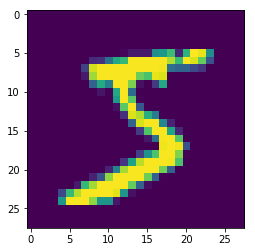

In [4]:
# Display image shape of image 
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshape image size
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert numpy array to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
#2nd sample N/W ( Batch Norm + NO dropout + reducing parmeters)
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())


model.add(Convolution2D(16, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7)) #seeing 7x7 receptive fild
model.add(Flatten())
model.add(Activation('softmax'))



Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 16)        0         
__________

In [0]:
# def lr_schedule(epoch):
#     lrate = 0.01
#     if epoch > 90:
#         lrate = 0.01
#     elif epoch > 135:
#         lrate = 0.001       
#     return lrate
# LR_scheduler = LearningRateScheduler(lr_schedule)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train,  epochs=10,
    verbose=1, validation_data=(X_test, Y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.1229 - acc: 0.9612 - val_loss: 0.0699 - val_acc: 0.9765
Epoch 2/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0525 - acc: 0.9832 - val_loss: 0.0444 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0416 - acc: 0.9869 - val_loss: 0.0351 - val_acc: 0.9891
Epoch 4/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0356 - acc: 0.9889 - val_loss: 0.0407 - val_acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0317 - acc: 0.9904 - val_loss: 0.0335 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0293 - acc: 0.9899 - val_loss: 0.0300 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 17s 290us/

In [15]:
model.fit(X_train, Y_train,  epochs=10,
    verbose=1, validation_data=(X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0199 - acc: 0.9931 - val_loss: 0.0299 - val_acc: 0.9904
Epoch 2/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0185 - acc: 0.9935 - val_loss: 0.0317 - val_acc: 0.9910
Epoch 3/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.0194 - acc: 0.9935 - val_loss: 0.0286 - val_acc: 0.9908
Epoch 4/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0165 - acc: 0.9945 - val_loss: 0.0297 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0159 - acc: 0.9945 - val_loss: 0.0317 - val_acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0155 - acc: 0.9948 - val_loss: 0.0284 - val_acc: 0.9918
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0154 - acc: 0.9949 - val_loss: 0.